In [2]:
from keras.datasets import fashion_mnist
from sklearn import datasets
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Normalization, Input
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [3]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
batch_size = 64
classes = 10
epochs = 20

In [7]:
from keras.backend import categorical_crossentropy
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64,kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(128,kernel_size=(3,3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes, activation='softmax'))

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model.summary()

train = model.fit(x_train, y_train, batch_size, epochs=epochs, verbose=1)  #verbose=1 : hiển thị toàn bộ giá trị ra màn hình, =2 : học tới đâu hiển thị tới đó

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [8]:
model.save('/content/drive/MyDrive/Saved_Train/fashion_mnist.h5')

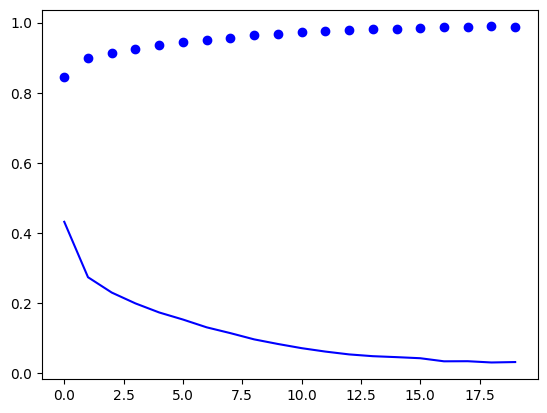

In [9]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.show()